### Librerie

In [31]:
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import confusion_matrix
import seaborn as sns 
from scipy import stats
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt

### Preparazione dei dati

In [32]:
accuracy_ab = 0.8098
precision_ab = 0.8557
recall_ab = 0.83
f1_score_ab = 0.8426
roc_auc_ab = 0.8039

accuracy_bnb = 0.6135
precision_bnb = 0.6135
recall_bnb = 1
f1_score_bnb = 0.7605
roc_auc_bnb = 0.5000

accuracy_gnb = 0.7669
precision_gnb = 0.9429
recall_gnb = 0.6600
f1_score_gnb = 0.7765
roc_auc_gnb = 0.7983

accuracy_gb = 0.8098
precision_gb = 0.8286
recall_gb = 0.87
f1_score_gb = 0.8488
roc_auc_gb = 0.7921

accuracy_mnb = 0.6994
precision_mnb = 0.84
recall_mnb = 0.63
f1_score_mnb = 0.72
roc_auc_mnb = 0.7198

accuracy_rf = 0.7680
precision_rf = 0.7458
recall_rf = 0.88
f1_score_rf = 0.8073
roc_auc_rf = 0.7548

accuracy_svm = 0.7853
precision_svm = 0.7982
recall_svm = 0.87
f1_score_svm = 0.8325
roc_auc_svm = 0.7604

accuracy_xgb = 0.8039
precision_xgb = 0.75
recall_xgb = 0.75
f1_score_xgb = 0.75
roc_auc_xgb = 0.8039

data = {
    'AdaBoost': [accuracy_ab, precision_ab, recall_ab, f1_score_ab, roc_auc_ab],
    'Bernoulli NB': [accuracy_bnb, precision_bnb, recall_bnb, f1_score_bnb, roc_auc_bnb],
    'Gaussian NB': [accuracy_gnb, precision_gnb, recall_gnb, f1_score_gnb, roc_auc_gnb],
    'Gradient Boosting': [accuracy_gb, precision_gb, recall_gb, f1_score_gb, roc_auc_gb],
    'Multinomial NB': [accuracy_mnb, precision_mnb, recall_mnb, f1_score_mnb, roc_auc_mnb],
    'Random Forest': [accuracy_rf, precision_rf, recall_rf, f1_score_rf, roc_auc_rf],
    'Support Vector Machine': [accuracy_svm, precision_svm, recall_svm, f1_score_svm, roc_auc_svm],
    'XGBoost': [accuracy_xgb, precision_xgb, recall_xgb, f1_score_xgb, roc_auc_xgb],
}

df = pd.DataFrame(data, index=['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC'])

### Performance dei modelli sul dataset ST000369

Per ciascuna metrica illustriamo i modelli di apprendimento automatico con la metrica migliore.

In [26]:
best_algorithms = df.idxmax(axis=1)

# Stampa i risultati
print("Algoritmo migliore per ciascuna metrica:")
for metric, algorithm in best_algorithms.items():
    print(f"{metric}: {algorithm}")

Algoritmo migliore per ciascuna metrica:
Accuracy: AdaBoost
Precision: Gaussian NB
Recall: Bernoulli NB
F1-score: Gradient Boosting
ROC AUC: AdaBoost


Adesso visualizziamo le performance dei vari modelli.

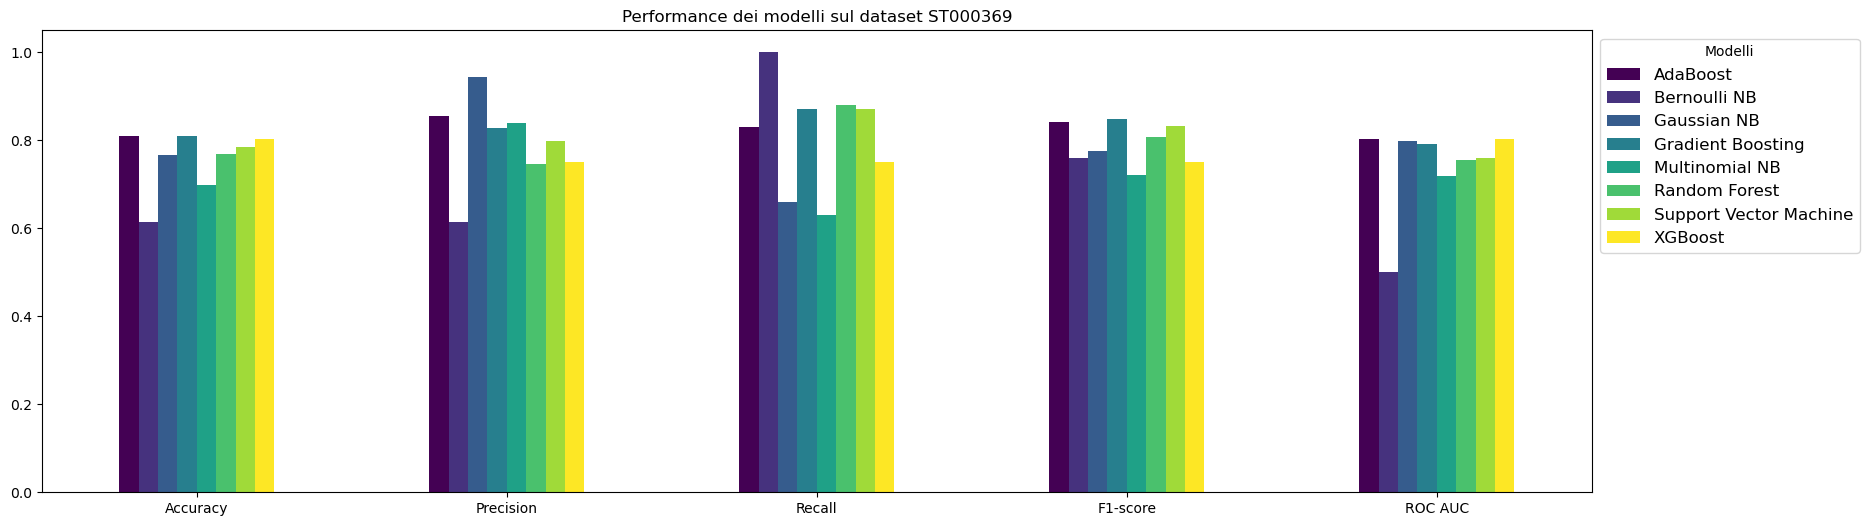

In [27]:
df.plot(kind='bar', rot=0, figsize=(20, 6), colormap='viridis')
plt.title('Performance dei modelli sul dataset ST000369')
plt.legend(title='Modelli', bbox_to_anchor=(1, 1), loc='upper left', fontsize='large')

plt.show()

In [25]:
fig = px.bar(df.T, barmode='group', title='Confronto delle performance dei modelli sul dataset ST000369',
             labels={'value': 'Valore', 'variable': 'Metrica', 'index': 'Modello',},
             width=800, height=500)

fig.update_layout(showlegend=True, legend_title='Metriche', legend=dict(x=1, y=1, traceorder='normal'))

fig.update_xaxes(title_text='')
fig.update_yaxes(title_text='')

### Curve ROC per ciascun modello

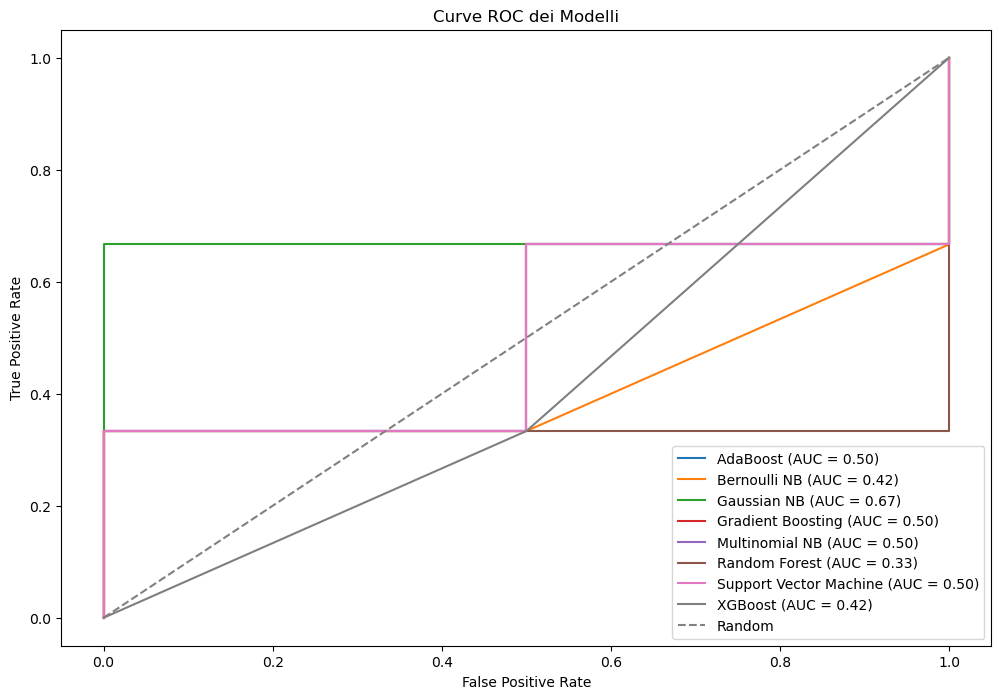

In [4]:
# Disegniamo le curve ROC per ciascun modello
plt.figure(figsize=(12, 8))

for model_name in data.keys():
    scores = data[model_name]
    fpr, tpr, _ = roc_curve([0, 1, 1, 0, 1], scores)  
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curve ROC dei Modelli')
plt.legend(loc='lower right')
plt.show()

### Boxplot delle metriche ottenute

Il boxplot ci da un'idea della variabilità delle performance di ciascun modello sulle diverse metriche.

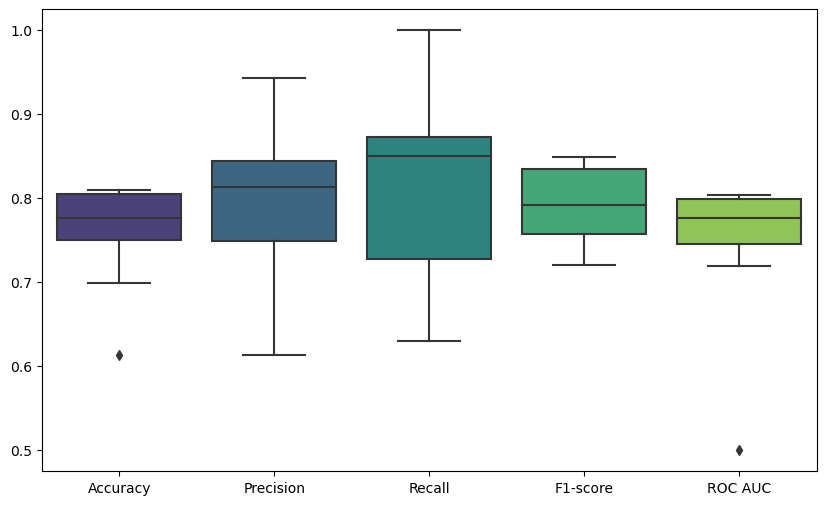

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.T, palette='viridis')
plt.show()

### Heatmap

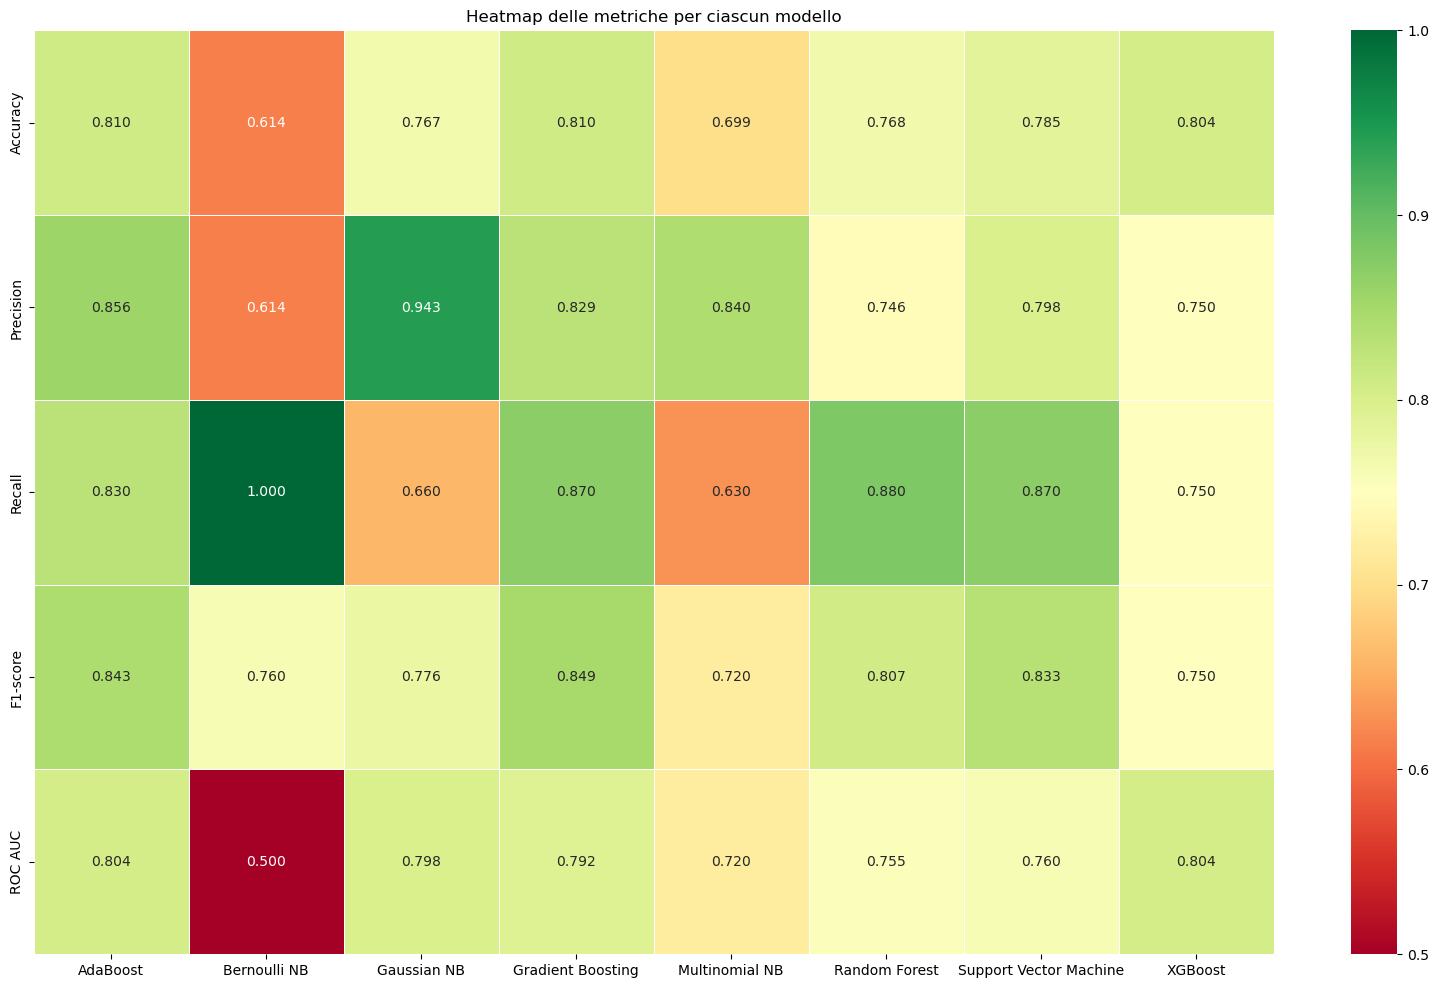

In [6]:
plt.figure(figsize=(20, 12))

sns.heatmap(df, annot=True, cmap='RdYlGn', fmt=".3f", linewidths=.5)
plt.title('Heatmap delle metriche per ciascun modello')
plt.show()